In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('claimants.csv')
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [3]:
df.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [5]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [6]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
df['ATTORNEY'].value_counts()

ATTORNEY
0    685
1    655
Name: count, dtype: int64

In [9]:
clmsex = df['CLMSEX'].mode()[0]
df['CLMSEX'] = df['CLMSEX'].fillna(clmsex)

In [10]:
clminsur = df['CLMINSUR'].mode()[0]
df['CLMINSUR'] = df['CLMINSUR'].fillna(clminsur)

In [11]:
seat_belt = df['CLMINSUR'].mode()[0]
df['SEATBELT'] = df['SEATBELT'].fillna(seat_belt)

In [12]:
df['CLMAGE'] = df['CLMAGE'].fillna(df['CLMAGE'].mean())

In [13]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [14]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.076564,0.076631,-0.041709,0.009886,-0.219715
CLMSEX,0.076564,1.000000,0.065976,0.017660,-0.022444,-0.028412
CLMINSUR,0.076631,0.065976,1.000000,0.026647,0.044706,0.004641
SEATBELT,-0.041709,0.017660,0.026647,1.000000,-0.042904,0.034326
CLMAGE,0.009886,-0.022444,0.044706,-0.042904,1.000000,0.057641
LOSS,-0.219715,-0.028412,0.004641,0.034326,0.057641,1.000000


In [16]:
x = df.drop(["ATTORNEY","CLMSEX","CLMINSUR","CLMAGE"], axis=1)
y = df['ATTORNEY']

In [22]:
from sklearn.preprocessing import StandardScaler

# create an object of standard scaler
scaler = StandardScaler()

array_scaled = scaler.fit_transform(x)
array_scaled

array([[-0.23477246,  2.92804365],
       [-0.23477246, -0.27417709],
       [-0.23477246, -0.32693769],
       ...,
       [-0.23477246, -0.34866265],
       [-0.23477246, -0.05918468],
       [-0.23477246, -0.29326871]])

<Axes: >

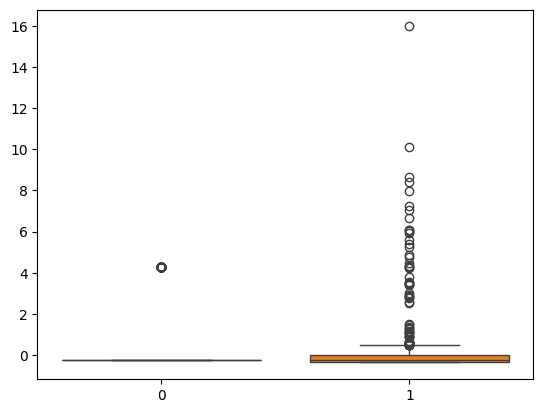

In [19]:
sns.boxplot(array_scaled)

In [21]:
df = pd.DataFrame(array_scaled, columns=["SEATBELT","LOSS"])
df

,SEATBELT,LOSS
0,-0.234772,2.928044
1,-0.234772,-0.274177
2,-0.234772,-0.326938
3,4.259443,-0.354494
4,-0.234772,-0.354400
...,...,...
1335,-0.234772,-0.303802
1336,-0.234772,-0.009528
1337,-0.234772,-0.348663
1338,-0.234772,-0.059185


In [23]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)